In [5]:
import pandas as pd
import numpy as np

## step 1 : import dataset
### Tham số	Ý nghĩa 
### minlatitude	Giới hạn vĩ độ thấp nhất (điểm dưới cùng)
### maxlatitude	Giới hạn vĩ độ cao nhất (điểm trên cùng)
### minlongitude	Giới hạn kinh độ thấp nhất (điểm bên trái)
### maxlongitude	Giới hạn kinh độ cao nhất (điểm bên phải)
### minmagnitude	Chỉ lấy trận động đất có độ lớn từ giá trị này trở lên

In [6]:
url = (
    "https://earthquake.usgs.gov/fdsnws/event/1/query?"
    "format=csv"
    "&starttime=2000-01-01"
    "&endtime=2025-01-01"
    "&minlatitude=8"
    "&maxlatitude=24"
    "&minlongitude=102"
    "&maxlongitude=110"
    "&minmagnitude=3.0"
)
df = pd.read_csv(url)
# Hiển thị toàn bộ dữ liệu của df
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None) 
display(df)



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-12-03T14:15:22.124Z,15.1197,108.1952,9.753,3.9,mb,26.0,96.0,3.990,0.73,...,2025-02-15T18:28:18.040Z,"24 km S of Trà My, Vietnam",earthquake,8.56,5.238,0.155,12.0,reviewed,us,us
1,2024-11-30T10:12:27.167Z,14.9592,108.0329,10.681,4.1,mb,23.0,103.0,3.943,0.99,...,2025-02-02T00:55:38.040Z,"46 km SSW of Trà My, Vietnam",earthquake,9.82,5.215,0.145,13.0,reviewed,us,us
2,2024-10-12T11:39:44.580Z,14.8505,108.3258,10.680,4.4,mb,22.0,89.0,4.402,0.80,...,2024-12-23T15:47:06.040Z,"55 km SSE of Trà My, Vietnam",earthquake,9.55,3.916,0.170,10.0,reviewed,us,us
3,2024-08-20T06:05:07.317Z,14.8133,108.3139,10.000,4.2,mb,9.0,123.0,4.441,0.92,...,2024-11-02T21:29:14.040Z,"59 km S of Trà My, Vietnam",earthquake,10.27,1.972,0.303,3.0,reviewed,us,us
4,2024-07-28T04:35:12.576Z,14.7842,108.2285,8.078,5.1,mww,101.0,79.0,4.495,0.78,...,2024-10-08T21:49:13.005Z,"53 km NNE of Kon Tum, Vietnam",earthquake,7.95,3.426,0.062,25.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2001-04-30T22:49:33.830Z,23.0380,102.2660,33.000,4.5,mb,44.0,NaN,NaN,1.04,...,2014-11-07T01:12:39.871Z,"97 km WSW of Gejiu, China",earthquake,NaN,NaN,NaN,16.0,reviewed,us,us
110,2001-04-02T20:45:50.920Z,22.1240,103.1570,33.000,4.4,mb,26.0,NaN,NaN,1.02,...,2014-11-07T01:12:30.879Z,"74 km WSW of Sa Pa, Vietnam",earthquake,NaN,NaN,NaN,7.0,reviewed,us,us
111,2001-03-04T20:18:51.200Z,21.3640,102.9290,10.000,4.5,mb,23.0,NaN,NaN,0.97,...,2014-11-07T01:12:18.380Z,"10 km WSW of Dien Bien Phu, Vietnam",earthquake,NaN,NaN,NaN,10.0,reviewed,us,us
112,2001-02-19T19:02:52.400Z,21.2920,102.8820,10.000,4.0,mb,18.0,NaN,NaN,1.25,...,2014-11-07T01:12:10.354Z,"17 km SW of Dien Bien Phu, Vietnam",earthquake,NaN,NaN,NaN,3.0,reviewed,us,us


#### phân bố động đất theo năm



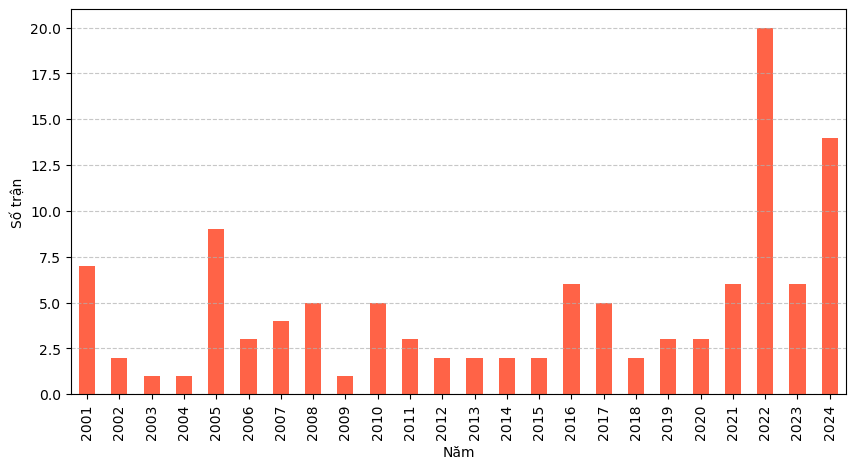

In [7]:
import matplotlib.pyplot as plt

df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

count_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
count_by_year.plot(kind='bar', color='tomato')
# plt.title("Số lượng trận động đất theo năm (2000–2025)")
plt.xlabel("Năm")
plt.ylabel("Số trận")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


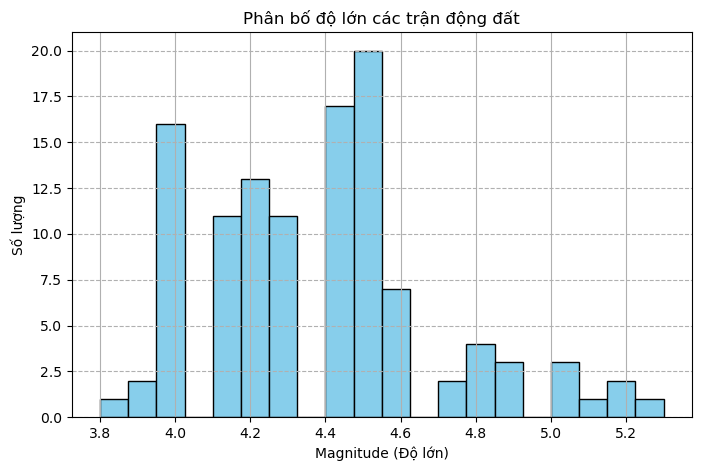

In [8]:
plt.figure(figsize=(8, 5))
df['mag'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Phân bố độ lớn các trận động đất")
plt.xlabel("Magnitude (Độ lớn)")
plt.ylabel("Số lượng")
plt.grid(axis='y', linestyle='--')
plt.show()


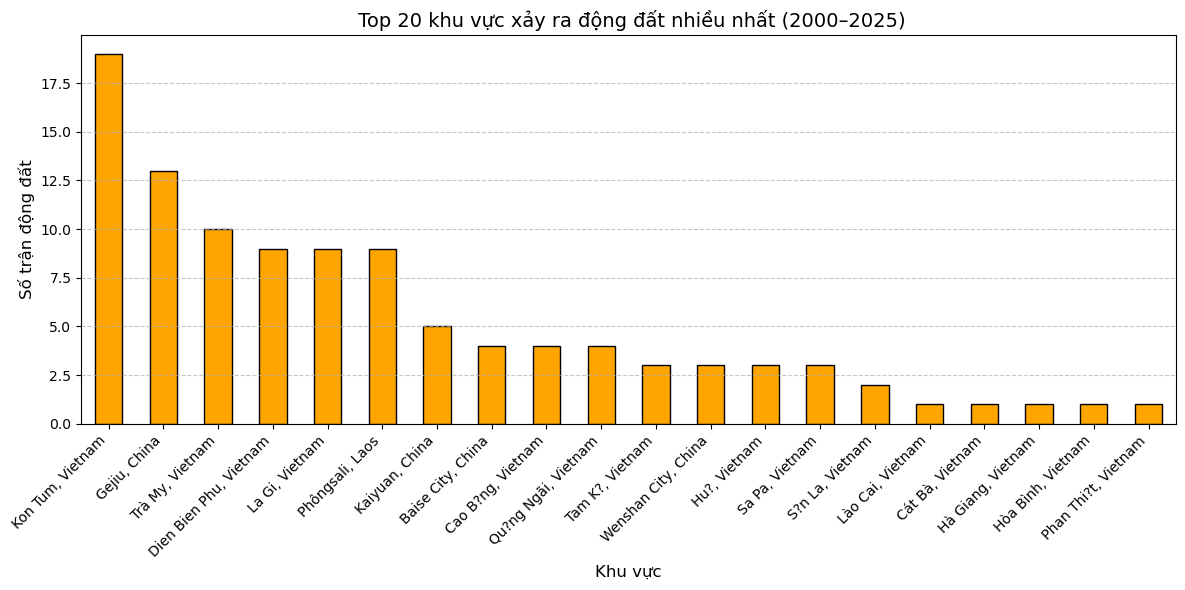

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Bước 1: Đọc dữ liệu từ file CSV
url = (
    "https://earthquake.usgs.gov/fdsnws/event/1/query?"
    "format=csv"
    "&starttime=2000-01-01"
    "&endtime=2025-01-01"
    "&minlatitude=8"
    "&maxlatitude=24"
    "&minlongitude=102"
    "&maxlongitude=110"
    "&minmagnitude=3.0"
)
df = pd.read_csv(url)  

# Bước 2: Lọc các cột cần thiết
columns_needed = ['time', 'latitude', 'longitude', 'depth', 'mag', 'place', 'type']
df = df[columns_needed]

# Bước 3: Làm sạch dữ liệu
df.dropna(inplace=True)
df['time'] = pd.to_datetime(df['time'])

# Bước 4: Trích xuất tên khu vực từ cột "place"
def extract_location(place):
    if pd.isna(place):
        return "Không rõ"
    if "of" in place:
        return place.split("of")[-1].strip()
    return place.strip()

df['region'] = df['place'].apply(extract_location)

# Bước 5: Đếm số trận động đất theo khu vực (top 10)
top_regions = df['region'].value_counts().head(20)

# Bước 6: Vẽ biểu đồ
plt.figure(figsize=(12, 6))
top_regions.plot(kind='bar', color='orange', edgecolor='black')
plt.title(" Top 20 khu vực xảy ra động đất nhiều nhất (2000–2025)", fontsize=14)
plt.xlabel("Khu vực", fontsize=12)
plt.ylabel("Số trận động đất", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
